In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import exp
import os, time

# FORMATANDO BLOWING
- Definindo os critérios de "inicio" e "fim" de sopro manualmente, isso foi feito individualmente em cada arquivo usando o critério de derivada para isso, mas a ideia é o modelo servir de modo geral

In [94]:
def isBlowing(start, end):
    global is_blowing

    if start:
        is_blowing = True

    if end:
        is_blowing = False

    return is_blowing


fileNum  = 6
filePath = f'test_{fileNum}.csv'
df = pd.read_csv(filePath)
df.head()

,time,pressure,derivative,blowing,start_blow,stop_blow
0,4.1,26.515547,0.157616,False,False,True
1,4.2,26.522435,0.128884,False,False,True
2,4.3,26.528385,0.105821,False,False,True
3,4.4,26.535764,0.088738,False,False,True
4,4.5,26.541553,0.071257,False,False,True


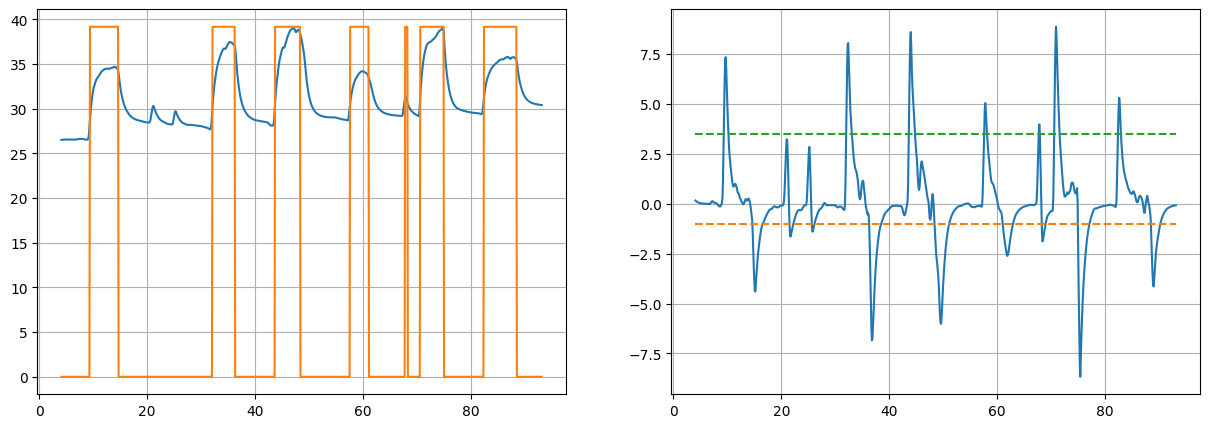

In [99]:
df = df.loc[df.time > 3.0]
is_blowing   = False
lower, upper = (-1, 3.5)

df['start_blow'] = df.derivative > upper
df['stop_blow']  = df.derivative < lower
df['blowing'] = df.apply(lambda row: isBlowing(row.start_blow, row.stop_blow), axis=1)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(df.time, df.pressure)
plt.plot(df.time, df.blowing*df.pressure.max())
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(df.time, df.derivative)
plt.plot(df.time, lower * np.ones_like(df.time), '--')
plt.plot(df.time, upper * np.ones_like(df.time), '--')
plt.grid()
df.to_csv(filePath, index=None)

# JUNTANDO TABELAS
- Todos os arquivos agora serão juntados em 1 só, para isso, o tempo terá que iniciar (ser somado) partir do último valor do arquivo anterior (para ficar contínuo)

In [100]:
files = [file for file in os.listdir(None) if '.csv' in file]

def getAllFiles(files, showName=False):
    df = pd.DataFrame()

    for filePath in files:
        if showName:
            print(filePath)
        
        aux = pd.read_csv(filePath)
        aux['time'] = aux.time - aux.time.values[0]
        t0  = 0 if len(df) == 0 else df.time.values[-1]

        aux['time'] = aux.time + t0
        df = pd.concat([df, aux])

    return df


df = getAllFiles(files, showName=True) 
df

test_1.csv
test_2.csv
test_3.csv
test_4.csv
test_5.csv
test_6.csv


,time,pressure,derivative,blowing,start_blow,stop_blow
0,0.0,41.299880,0.372273,False,False,False
1,0.1,41.316720,0.315617,False,False,False
2,0.2,41.332510,0.260945,False,False,False
3,0.3,41.344340,0.205060,False,False,False
4,0.4,41.352390,0.153722,False,False,False
...,...,...,...,...,...,...
886,609.0,30.442043,-0.105082,False,False,False
887,609.1,30.433882,-0.098400,False,False,False
888,609.2,30.425503,-0.092150,False,False,False
889,609.3,30.419050,-0.082493,False,False,False


# OBTENDO A VARIAVEL DESEJADA
Os valores de início e fim de sopro são os pontos discretizados ao longo do gráfico, o objetivo do modelo é encontrar o momento que iniciou o sopro, e o momento que não há mais sopro

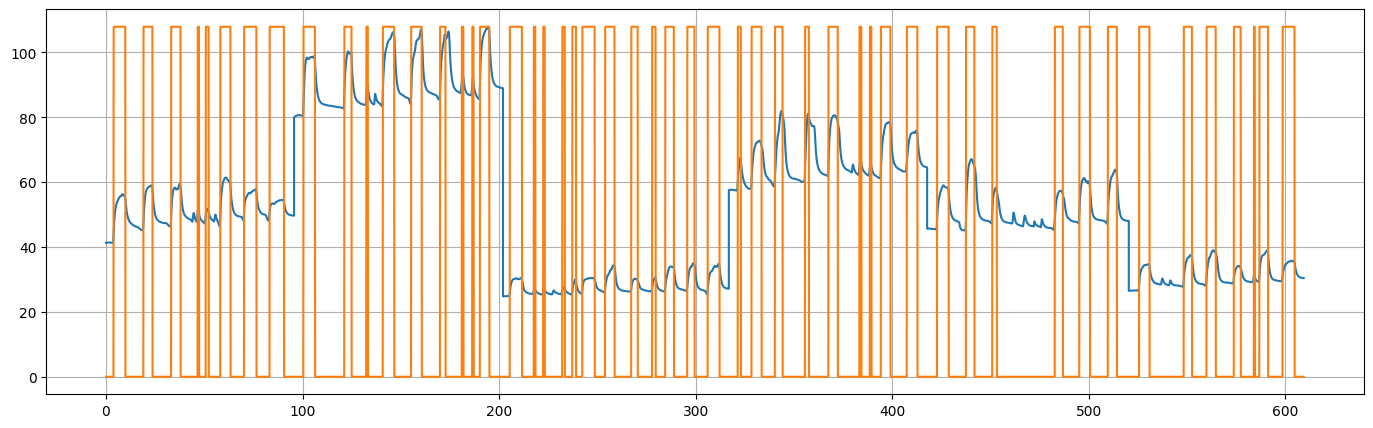

In [101]:
df.to_csv('../DataBase.csv', index=None)

plt.figure(figsize=(17, 5))
plt.plot(df.time, df.pressure)
plt.plot(df.time, df.blowing * df.pressure.max())
plt.grid()

test_1.csv


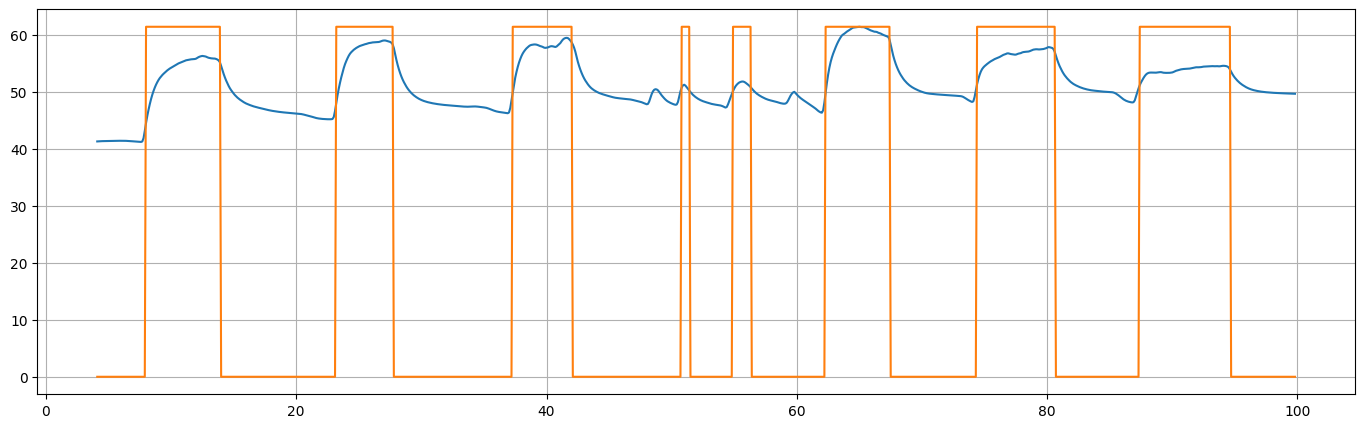

test_2.csv


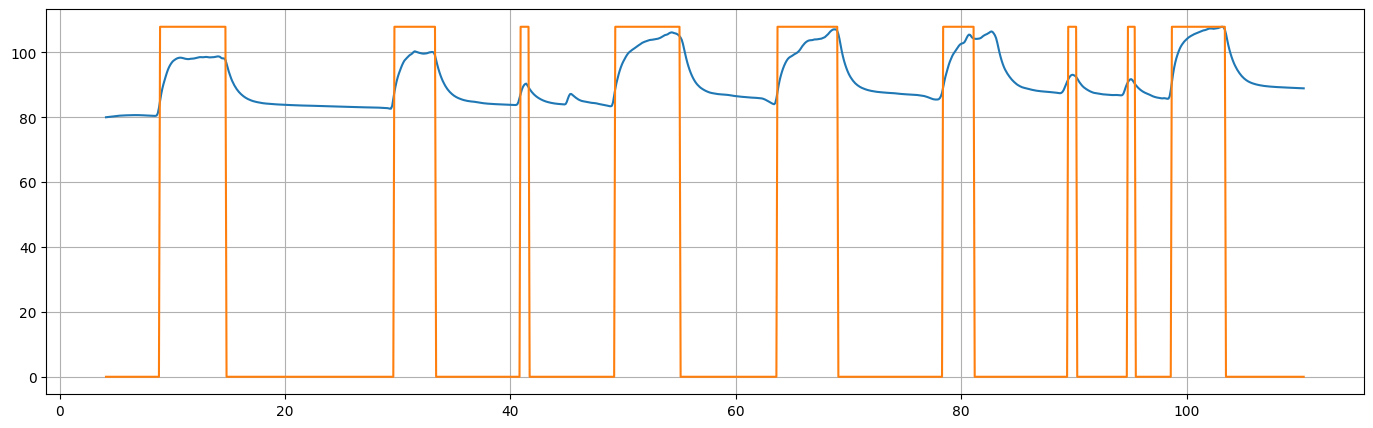

test_3.csv


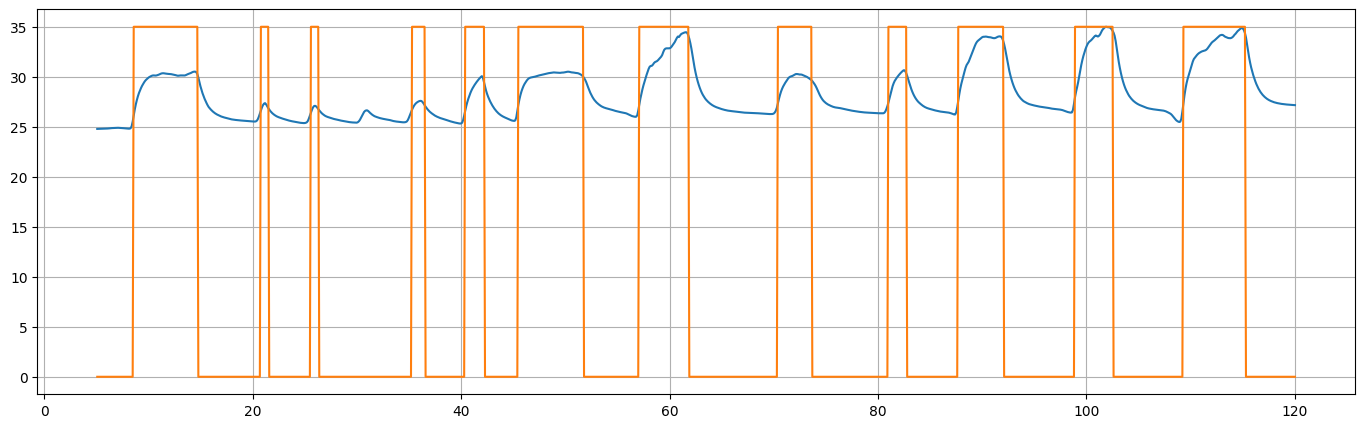

test_4.csv


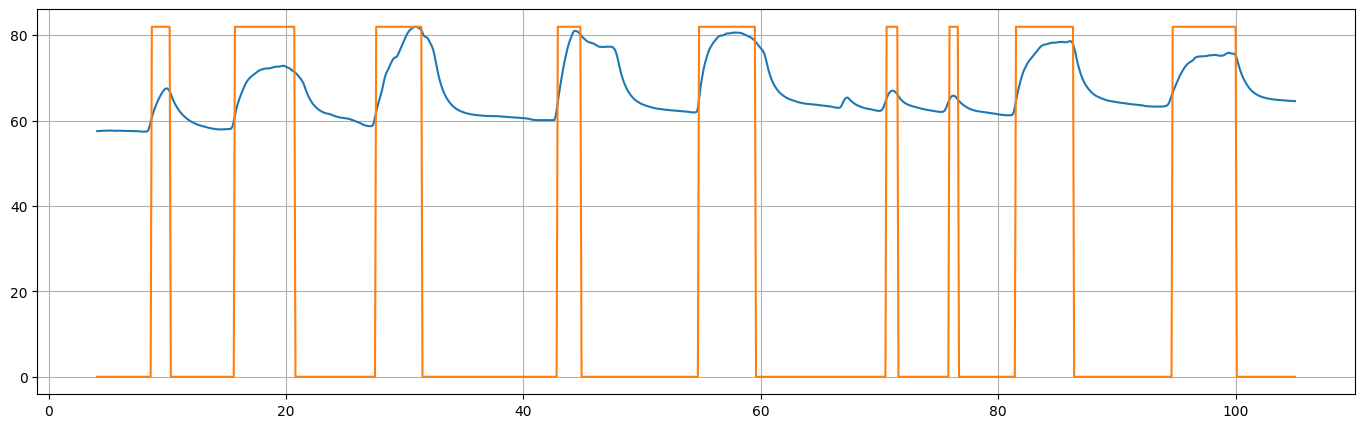

test_5.csv


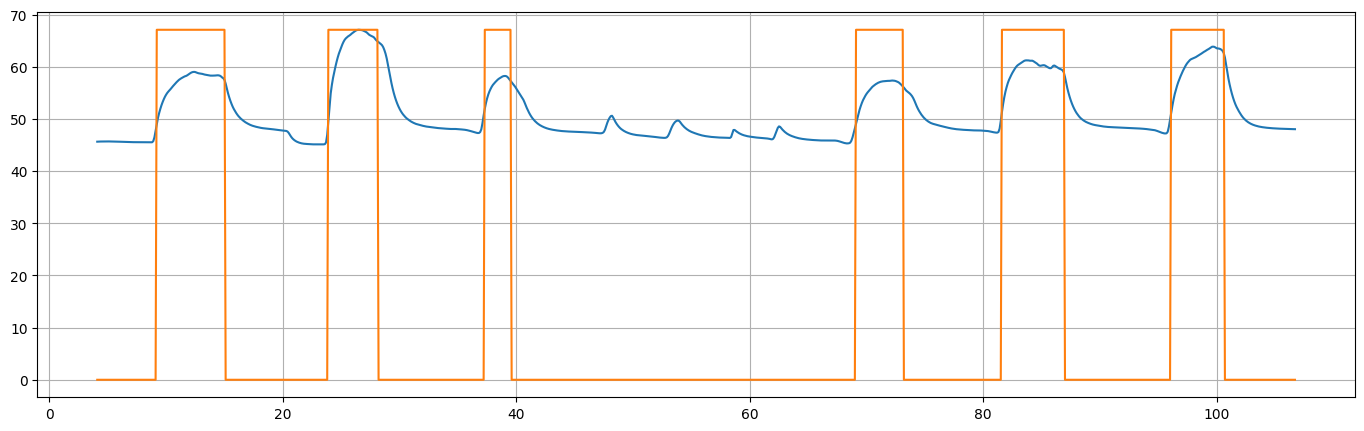

test_6.csv


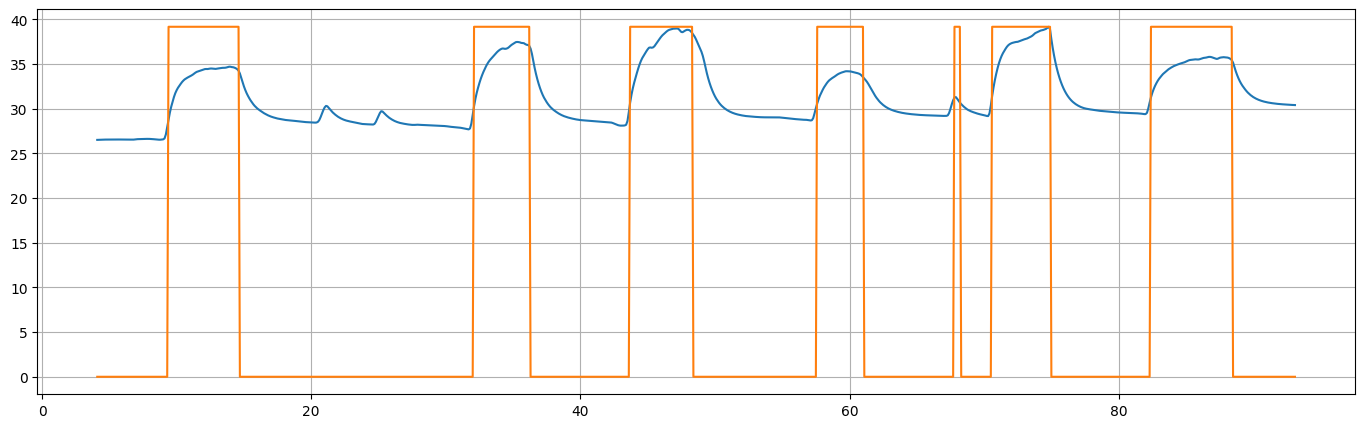

In [102]:
for path in files:
    df = pd.read_csv(path)
    print(path)
    plt.figure(figsize=(17, 5))
    plt.plot(df.time, df.pressure)
    plt.plot(df.time, df.blowing * df.pressure.max())
    plt.grid(), plt.show()